**Imports**

In [1]:
import numpy as np, os, seaborn as sns, sys
from matplotlib import pyplot as plt
from tqdm import tqdm

**Fill in data directory**

In [9]:
outdir = "./eldir-outputs"

**Compute number of generations**

In [10]:
subdirs = os.listdir(outdir)
generations = [s for s in subdirs if s.isdigit()]
generations = sorted(generations, key=int)[1:]

**Collect fitness statistics across generations**

In [11]:
generational_means = []
generational_stds = []
generational_best = []
for g in tqdm(generations):
    fitness = np.load(os.path.join(outdir, g, "robots-fitness.npy"))
    fitness = np.max(fitness, axis=1)
    generational_means.append(np.mean(fitness))
    generational_stds.append(np.std(fitness))
    generational_best.append(np.max(fitness))
generational_means = np.array(generational_means)
generational_stds = np.array(generational_stds)
generational_best = np.array(generational_best)

100%|██████████| 40/40 [00:00<00:00, 3405.85it/s]


**Plot fitness stats**

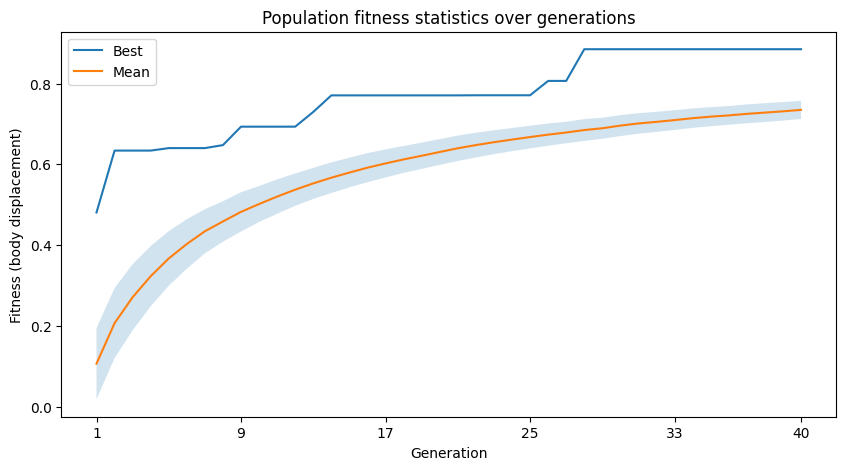

In [12]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=generations, y=generational_best, label="Best")
sns.lineplot(x=generations, y=generational_means, label="Mean")
plt.fill_between(generations, generational_means - generational_stds, generational_means + generational_stds, alpha=0.2)
gen_labels = [int(g) for g in generations]
max_gen = max(gen_labels)
while len(gen_labels) > 10:
    gen_labels = gen_labels[::2]
    if 1 not in gen_labels:
        gen_labels = [1] + gen_labels
    if max_gen not in gen_labels:
        gen_labels = gen_labels + [max_gen]
gen_labels = [str(g) for g in gen_labels]
plt.xticks(gen_labels)
plt.xlabel("Generation")
plt.ylabel("Fitness (body displacement)")
plt.title("Population fitness statistics over generations")
plt.legend()